In [6]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import re

# def web_scraping(url, headers):
#     # Lists to store data
#     prices_list = []
#     locations_list = []
#     num_rooms_list = []
#     area_list = []
#     floor_list = []

#     for i in range(1, 200):
#         base_url = f'{url}?page={i}'
#         page = requests.get(base_url, headers=headers)
#         soup = bs(page.content, features='lxml')

#         prices = soup.find_all('div', {'class': "price"})
#         locations = soup.find_all('div', {'class': "location"})
#         rooms = soup.find_all('ul', {'class': "name"})

#         for j in range(len(prices)):
#             price = int(prices[j].text[:-3].replace(' ', ''))
#             loc = locations[j].text.strip()
#             room_text = rooms[j].text.strip()

#             # Use regex to extract room details
#             rooms_match = re.search(r'(\d+ otaqlı).*?(\d+ m²).*?(\d+/\d+ mərtəbə)', room_text)
#             if rooms_match:
#                 num_rooms = rooms_match.group(1)
#                 area = rooms_match.group(2)
#                 floor = rooms_match.group(3)
#             else:
#                 num_rooms = "N/A"
#                 area = "N/A"
#                 floor = "N/A"

#             # Append data to lists
#             prices_list.append(price)
#             locations_list.append(loc)
#             num_rooms_list.append(num_rooms)
#             area_list.append(area)
#             floor_list.append(floor)

#     # Create DataFrame
#     data = {
#         'Price': prices_list,
#         'Location': locations_list,
#         'Number of Rooms': num_rooms_list,
#         'Area': area_list,
#         'Floor': floor_list
#     }

#     df = pd.DataFrame(data)

#     return df

# # Define headers
# headers = {
#     'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.3'
# }
# url='https://bina.az/alqi-satqi'
# # Call the web scraping function
# df_bina_properties = web_scraping(url, headers)

# # Print the DataFrame (optional)
# print(df_bina_properties)

# # Save the DataFrame to a CSV file
# df_bina_properties.to_csv('bina_properties.csv', index=False)



In [7]:
data=pd.read_csv('bina_properties.csv')
df=pd.DataFrame(data)
df.replace("N/A", pd.NA, inplace=True)

# Drop rows where any column contains None
df_cleaned = df.dropna()

# Print the cleaned DataFrame (optional)
print(df_cleaned)
df_cleaned

       Price              Location Number of Rooms    Area          Floor
0     103000            Əhmədli m.        2 otaqlı   42 m²    8/9 mərtəbə
1     484738           Nardaran q.        2 otaqlı    6 m²    5/7 mərtəbə
3     439000           8 Noyabr m.        3 otaqlı  145 m²  10/27 mərtəbə
6     259500             Nizami m.        3 otaqlı  115 m²   6/14 mərtəbə
7     150000       Həzi Aslanov q.        2 otaqlı   51 m²  14/18 mərtəbə
...      ...                   ...             ...     ...            ...
5565  285000           Binəqədi r.        4 otaqlı  150 m²   7/16 mərtəbə
5566  390000        İnşaatçılar m.        5 otaqlı  200 m²  16/17 mərtəbə
5567  270000  Şah İsmayıl Xətai m.        2 otaqlı   95 m²  13/20 mərtəbə
5569  399000        İnşaatçılar m.        3 otaqlı  103 m²  26/27 mərtəbə
5571  175000             Nəsimi m.        2 otaqlı   93 m²  13/16 mərtəbə

[4000 rows x 5 columns]


,Price,Location,Number of Rooms,Area,Floor
0,103000,Əhmədli m.,2 otaqlı,42 m²,8/9 mərtəbə
1,484738,Nardaran q.,2 otaqlı,6 m²,5/7 mərtəbə
3,439000,8 Noyabr m.,3 otaqlı,145 m²,10/27 mərtəbə
6,259500,Nizami m.,3 otaqlı,115 m²,6/14 mərtəbə
7,150000,Həzi Aslanov q.,2 otaqlı,51 m²,14/18 mərtəbə
...,...,...,...,...,...
5565,285000,Binəqədi r.,4 otaqlı,150 m²,7/16 mərtəbə
5566,390000,İnşaatçılar m.,5 otaqlı,200 m²,16/17 mərtəbə
5567,270000,Şah İsmayıl Xətai m.,2 otaqlı,95 m²,13/20 mərtəbə
5569,399000,İnşaatçılar m.,3 otaqlı,103 m²,26/27 mərtəbə


In [8]:
df_cleaned['Number of Rooms']=df_cleaned['Number of Rooms'].str.replace(' otaqlı','')
df_cleaned['Number of Rooms']=df_cleaned['Number of Rooms'].astype(int)

C:\Users\MSI GF75\AppData\Local\Temp\ipykernel_18668\2254136347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Number of Rooms']=df_cleaned['Number of Rooms'].str.replace(' otaqlı','')
C:\Users\MSI GF75\AppData\Local\Temp\ipykernel_18668\2254136347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Number of Rooms']=df_cleaned['Number of Rooms'].astype(int)


In [9]:
df_cleaned['Area']=df_cleaned['Area'].str.replace('m²','')
df_cleaned['Area']=df_cleaned['Area'].astype(int)
df_cleaned

C:\Users\MSI GF75\AppData\Local\Temp\ipykernel_18668\3333012574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Area']=df_cleaned['Area'].str.replace('m²','')
C:\Users\MSI GF75\AppData\Local\Temp\ipykernel_18668\3333012574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Area']=df_cleaned['Area'].astype(int)


,Price,Location,Number of Rooms,Area,Floor
0,103000,Əhmədli m.,2,42,8/9 mərtəbə
1,484738,Nardaran q.,2,6,5/7 mərtəbə
3,439000,8 Noyabr m.,3,145,10/27 mərtəbə
6,259500,Nizami m.,3,115,6/14 mərtəbə
7,150000,Həzi Aslanov q.,2,51,14/18 mərtəbə
...,...,...,...,...,...
5565,285000,Binəqədi r.,4,150,7/16 mərtəbə
5566,390000,İnşaatçılar m.,5,200,16/17 mərtəbə
5567,270000,Şah İsmayıl Xətai m.,2,95,13/20 mərtəbə
5569,399000,İnşaatçılar m.,3,103,26/27 mərtəbə


In [10]:
df_cleaned['Floor'] = df_cleaned['Floor'].str.replace('mərtəbə', '').str.strip()

# Veriyi '/' karakterine göre ayırma ve iki ayrı sütun oluşturma
df_cleaned[['Floor', 'Total Floors']] = df_cleaned['Floor'].str.split('/', expand=True)

# Bu iki sütunu uygun veri tiplerine dönüştürme
df_cleaned['Floor'] = df_cleaned['Floor'].astype(int)
df_cleaned['Total Floors'] = df_cleaned['Total Floors'].astype(int)

# Sonuçları kontrol etme
print(df_cleaned)

C:\Users\MSI GF75\AppData\Local\Temp\ipykernel_18668\4191965361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Floor'] = df_cleaned['Floor'].str.replace('mərtəbə', '').str.strip()
C:\Users\MSI GF75\AppData\Local\Temp\ipykernel_18668\4191965361.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['Floor', 'Total Floors']] = df_cleaned['Floor'].str.split('/', expand=True)
C:\Users\MSI GF75\AppData\Local\Temp\ipykernel_18668\4191965361.py:4: SettingWithCopyWarning: 
A value is tryin

       Price              Location  Number of Rooms  Area  Floor  Total Floors
0     103000            Əhmədli m.                2    42      8             9
1     484738           Nardaran q.                2     6      5             7
3     439000           8 Noyabr m.                3   145     10            27
6     259500             Nizami m.                3   115      6            14
7     150000       Həzi Aslanov q.                2    51     14            18
...      ...                   ...              ...   ...    ...           ...
5565  285000           Binəqədi r.                4   150      7            16
5566  390000        İnşaatçılar m.                5   200     16            17
5567  270000  Şah İsmayıl Xətai m.                2    95     13            20
5569  399000        İnşaatçılar m.                3   103     26            27
5571  175000             Nəsimi m.                2    93     13            16

[4000 rows x 6 columns]


C:\Users\MSI GF75\AppData\Local\Temp\ipykernel_18668\4191965361.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Floor'] = df_cleaned['Floor'].astype(int)
C:\Users\MSI GF75\AppData\Local\Temp\ipykernel_18668\4191965361.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Total Floors'] = df_cleaned['Total Floors'].astype(int)


In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Price            4000 non-null   int64 
 1   Location         4000 non-null   object
 2   Number of Rooms  4000 non-null   int32 
 3   Area             4000 non-null   int32 
 4   Floor            4000 non-null   int32 
 5   Total Floors     4000 non-null   int32 
dtypes: int32(4), int64(1), object(1)
memory usage: 156.2+ KB


In [12]:
df_cleaned.describe()

,Price,Number of Rooms,Area,Floor,Total Floors
count,4.000000e+03,4000.000000,4000.000000,4000.00000,4000.000000
mean,2.455217e+05,2.740000,92.628500,8.12950,13.682250
std,1.892667e+05,0.886621,59.742069,5.01044,5.398803
min,4.000000e+02,1.000000,1.000000,1.00000,1.000000
25%,1.383120e+05,2.000000,60.000000,4.00000,9.000000
50%,1.950000e+05,3.000000,83.000000,7.00000,16.000000
75%,2.900000e+05,3.000000,120.000000,12.00000,17.000000
max,3.200000e+06,9.000000,880.000000,27.00000,33.000000


In [13]:
df_cleaned.dtypes

Price               int64
Location           object
Number of Rooms     int32
Area                int32
Floor               int32
Total Floors        int32
dtype: object

#   Feature Engineering

In [14]:
a = df_cleaned['Location'].unique()
print(a)
print(len(a))


['Əhmədli m.' 'Nardaran q.' '8 Noyabr m.' 'Nizami m.' 'Həzi Aslanov q.'
 'Şah İsmayıl Xətai m.' 'Xutor q.' 'Qara Qarayev m.' 'Həzi Aslanov m.'
 'Qaraçuxur q.' 'Nəsimi r.' 'Səbail r.' '28 May m.' 'Binəqədi q.'
 'Binəqədi r.' 'Xətai r.' 'Gənclik m.' 'Nəriman Nərimanov m.' 'Zığ q.'
 'Ağ şəhər q.' 'Elmlər Akademiyası m.' '20 Yanvar m.' 'Memar Əcəmi m.'
 '9-cu mikrorayon q.' 'Yeni Günəşli q.' 'Bakmil m.' 'İnşaatçılar m.'
 'Xırdalan' 'Nərimanov r.' 'Köhnə Günəşli q.' 'Nizami r.' 'Abşeron r.'
 'Bakıxanov q.' 'Masazır q.' 'Sumqayıt' 'Bayıl q.' 'Badamdar q.'
 '8-ci mikrorayon q.' 'Yasamal q.' 'Neftçilər m.' 'Xalqlar Dostluğu m.'
 'İçəri Şəhər m.' 'Lökbatan q.' 'Əhmədli q.' '7-ci mikrorayon q.'
 '4-cü mikrorayon q.' 'Nəsimi m.' 'Hövsan q.' 'Yeni Yasamal q.'
 '8-ci kilometr q.' 'Azadlıq Prospekti m.' 'Lənkəran' 'Sahil m.'
 'Yasamal r.' 'Biləcəri q.' 'Saray q.' 'Koroğlu m.' 'Şıxov q.'
 'Böyükşor q.' 'Dərnəgül m.' 'Avtovağzal m.' 'Hökməli q.' 'Şirvan'
 'Sabunçu r.' 'Massiv V q.' 'Xəzər r.' 'Binə q.

In [15]:
import numpy as np
location_price_group = df_cleaned.groupby('Location')['Price'].mean()

# Ortalama fiyatlara göre sıralama
sorted_locations = location_price_group.sort_values(ascending=False).index

# Sıralamaya göre ilçeleri 15 gruba ayırma
group_size = len(sorted_locations) // 15
df_cleaned['Location_Group'] = np.nan

for i in range(15):
    start_idx = i * group_size
    end_idx = (i + 1) * group_size
    if i == 14:  # Son grupta kalanlar
        end_idx = len(sorted_locations)
    df_cleaned.loc[df_cleaned['Location'].isin(sorted_locations[start_idx:end_idx]), 'Location_Group'] = 0.5 + i * 0.5

# Sonuçları kontrol etme
print(df_cleaned.head(20))  # İlk 20 satırı görüntüleme

     Price              Location  Number of Rooms  Area  Floor  Total Floors  \
0   103000            Əhmədli m.                2    42      8             9   
1   484738           Nardaran q.                2     6      5             7   
3   439000           8 Noyabr m.                3   145     10            27   
6   259500             Nizami m.                3   115      6            14   
7   150000       Həzi Aslanov q.                2    51     14            18   
8   228000  Şah İsmayıl Xətai m.                3    82     14            20   
9   219999              Xutor q.                3   135      7            16   
14  275000       Qara Qarayev m.                3   120     13            17   
18  293000       Həzi Aslanov m.                3   130      6            17   
23  105000          Qaraçuxur q.                4    47      9             9   
24  595000             Nəsimi r.                4   179     20            24   
25  845000             Səbail r.        

C:\Users\MSI GF75\AppData\Local\Temp\ipykernel_18668\114762199.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Location_Group'] = np.nan


In [44]:
df_cleaned['Location_Group'].max()

7.5

Since the price in some areas of Baku city differs sharply from other areas, I made groupings with this method

In [43]:
location_groups = df_cleaned.groupby('Location_Group')['Location'].unique()

# Convert to a dictionary for better readability
location_groups_dict = location_groups.to_dict()

# Print the results
for group, locations in location_groups_dict.items():
    print(f"Location Group: {group}")
    print(f"Locations: {list(locations)}")


Location Group: 0.5
Locations: ['Şah İsmayıl Xətai m.', 'Ağ şəhər q.', 'Bayıl q.', 'İçəri Şəhər m.', 'Sahil m.']
Location Group: 1.0
Locations: ['Nardaran q.', 'Nizami m.', 'Nəsimi r.', '28 May m.', 'Kubinka q.']
Location Group: 1.5
Locations: ['8 Noyabr m.', 'Səbail r.', 'Gənclik m.', 'Nəriman Nərimanov m.', 'Yasamal q.']
Location Group: 2.0
Locations: ['Elmlər Akademiyası m.', 'Nərimanov r.', '8-ci mikrorayon q.', 'Koroğlu m.', '1-ci mikrorayon q.']
Location Group: 2.5
Locations: ['Həzi Aslanov q.', 'Xutor q.', 'Xətai r.', 'Şıxov q.', 'Böyükşor q.']
Location Group: 3.0
Locations: ['Qara Qarayev m.', 'İnşaatçılar m.', 'Badamdar q.', 'Dərnəgül m.', 'Xəzər r.']
Location Group: 3.5
Locations: ['Binəqədi r.', '20 Yanvar m.', 'Azadlıq Prospekti m.', 'Yasamal r.', '20-ci sahə q.']
Location Group: 4.0
Locations: ['Həzi Aslanov m.', 'Nizami r.', 'Neftçilər m.', '7-ci mikrorayon q.', 'Nəsimi m.']
Location Group: 4.5
Locations: ['Memar Əcəmi m.', '9-cu mikrorayon q.', 'Xalqlar Dostluğu m.', 'Ye

In [17]:
df_cleaned['Area_for_Room']=df_cleaned['Area']/df_cleaned['Number of Rooms']
df_cleaned

C:\Users\MSI GF75\AppData\Local\Temp\ipykernel_18668\3632912355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Area_for_Room']=df_cleaned['Area']/df_cleaned['Number of Rooms']


,Price,Location,Number of Rooms,Area,Floor,Total Floors,Location_Group,Area_for_Room
0,103000,Əhmədli m.,2,42,8,9,5.0,21.000000
1,484738,Nardaran q.,2,6,5,7,1.0,3.000000
3,439000,8 Noyabr m.,3,145,10,27,1.5,48.333333
6,259500,Nizami m.,3,115,6,14,1.0,38.333333
7,150000,Həzi Aslanov q.,2,51,14,18,2.5,25.500000
...,...,...,...,...,...,...,...,...
5565,285000,Binəqədi r.,4,150,7,16,3.5,37.500000
5566,390000,İnşaatçılar m.,5,200,16,17,3.0,40.000000
5567,270000,Şah İsmayıl Xətai m.,2,95,13,20,0.5,47.500000
5569,399000,İnşaatçılar m.,3,103,26,27,3.0,34.333333


#  Visualization


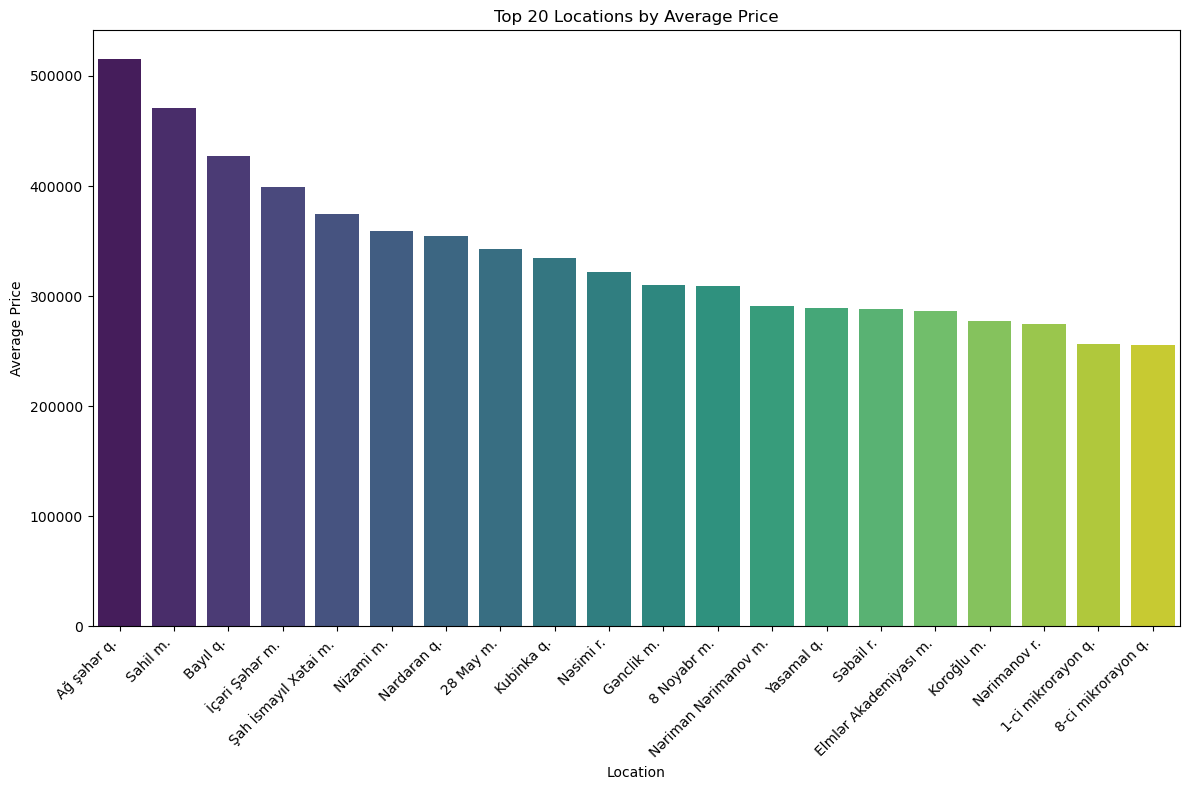

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
location_price_group = df_cleaned.groupby('Location')['Price'].mean()

# Ortalama fiyatlara göre sıralayın ve en pahalı 10 lokasyonu seçin
top_10_expensive_loc = location_price_group.sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_expensive_loc.index, y=top_10_expensive_loc.values, palette='viridis')
plt.title('Top 20 Locations by Average Price')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



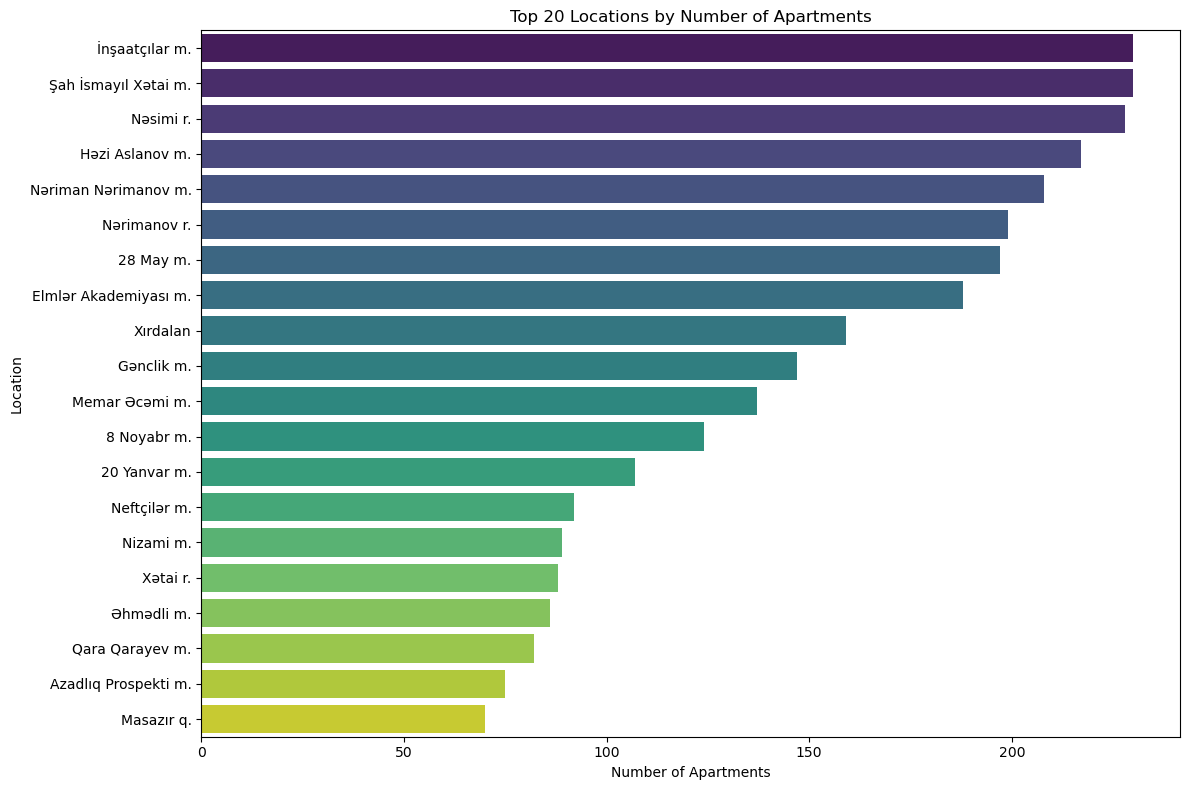

In [21]:
count_each_loc = []
col = 'Location'
counts = df_cleaned[col].value_counts()
count_each_loc.append(counts)
top_20_locations = count_each_loc[0].head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_locations.values, y=top_20_locations.index, palette='viridis')
plt.title('Top 20 Locations by Number of Apartments')
plt.xlabel('Number of Apartments')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

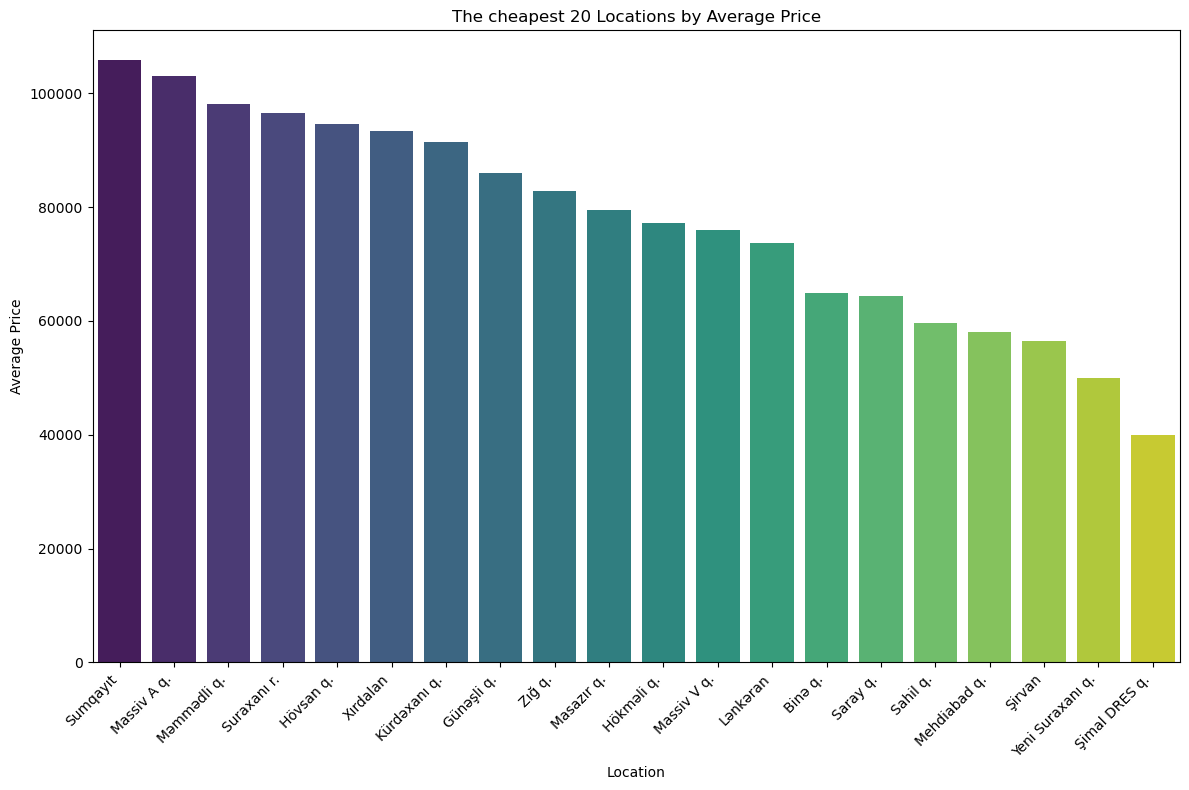

In [22]:
location_price_group = df_cleaned.groupby('Location')['Price'].mean()


top_10_expensive_loc = location_price_group.sort_values(ascending=False).tail(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_expensive_loc.index, y=top_10_expensive_loc.values, palette='viridis')
plt.title('The cheapest 20 Locations by Average Price')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


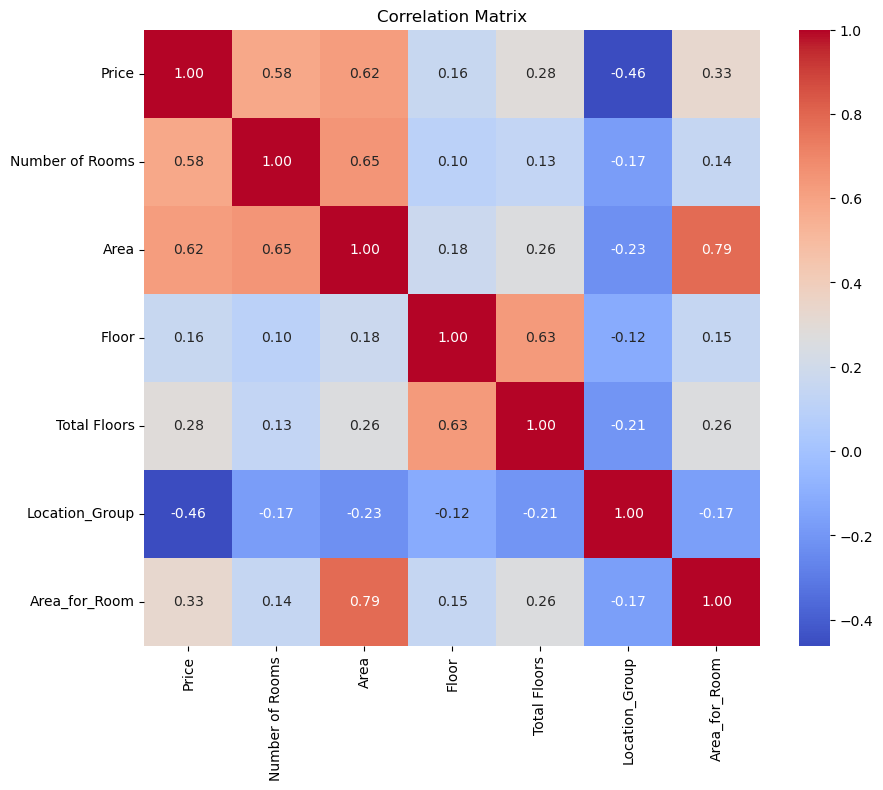

In [23]:
corr_matrix = df_cleaned.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

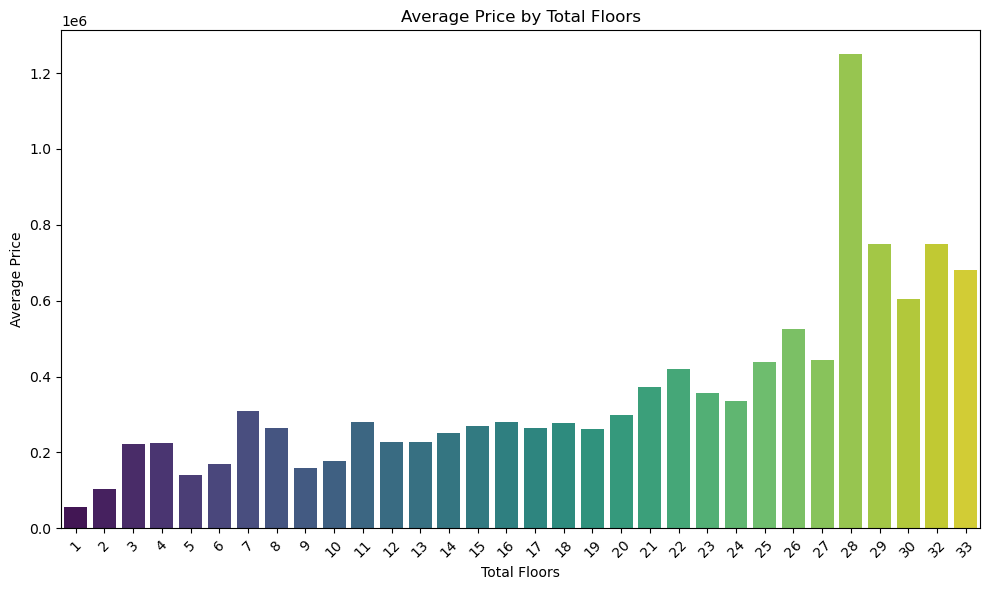

In [24]:
avg_prices = []
floor_values = []

for floor_value in df_cleaned['Total Floors'].unique():
    avg_price = df_cleaned[df_cleaned['Total Floors'] == floor_value]['Price'].mean()
    avg_prices.append(avg_price)
    floor_values.append(floor_value)

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x=floor_values, y=avg_prices, palette='viridis')
plt.title('Average Price by Total Floors')
plt.xlabel('Total Floors')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

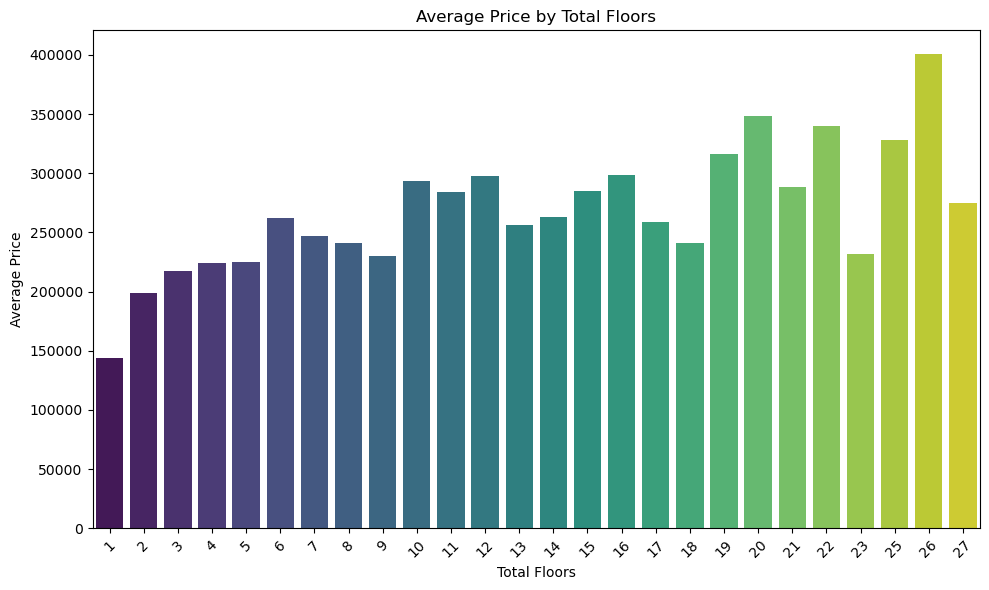

In [25]:
avg_prices1 = []
floor_values1 = []

for floor_value in df_cleaned['Floor'].unique():
    avg_price1 = df_cleaned[df_cleaned['Floor'] == floor_value]['Price'].mean()
    avg_prices1.append(avg_price1)
    floor_values1.append(floor_value)

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x=floor_values1, y=avg_prices1, palette='viridis')
plt.title('Average Price by Total Floors')
plt.xlabel('Total Floors')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

There can be several reasons why the upper floors of high-rise buildings are more expensive:

View and View: apartments on the upper floors can have city views or a wider view. These views can increase the value of the apartment.

Noise and Comfort: Apartments on lower floors can usually be noisier, while apartments on higher floors can be quieter. Living in these apartments can provide a higher level of comfort, which can increase prices.

Security and Privacy: Apartments on upper floors usually offer more privacy due to less passing traffic. In addition, it may be more advantageous in terms of security, which may affect prices.

Prestige and Image: For some people, living on high floors can be an indicator of prestige or image. These apartments usually appeal to higher income groups or the luxury market segment, which can increase prices.

Natural Light and Ventilation: Apartments on upper floors usually have more natural light and more ventilation. The clarity and spaciousness of these apartments can increase their prices.

These factors play an important role in explaining why upper floors in high-rise buildings are more expensive. However, this situation is not a general rule and may show differences in some special situations or locations.

In [27]:
df1=df_cleaned
df1

,Price,Location,Number of Rooms,Area,Floor,Total Floors,Location_Group,Area_for_Room
0,103000,Əhmədli m.,2,42,8,9,5.0,21.000000
1,484738,Nardaran q.,2,6,5,7,1.0,3.000000
3,439000,8 Noyabr m.,3,145,10,27,1.5,48.333333
6,259500,Nizami m.,3,115,6,14,1.0,38.333333
7,150000,Həzi Aslanov q.,2,51,14,18,2.5,25.500000
...,...,...,...,...,...,...,...,...
5565,285000,Binəqədi r.,4,150,7,16,3.5,37.500000
5566,390000,İnşaatçılar m.,5,200,16,17,3.0,40.000000
5567,270000,Şah İsmayıl Xətai m.,2,95,13,20,0.5,47.500000
5569,399000,İnşaatçılar m.,3,103,26,27,3.0,34.333333


In [28]:
df1 = df1.drop('Location', axis=1)


In [29]:
df1

,Price,Number of Rooms,Area,Floor,Total Floors,Location_Group,Area_for_Room
0,103000,2,42,8,9,5.0,21.000000
1,484738,2,6,5,7,1.0,3.000000
3,439000,3,145,10,27,1.5,48.333333
6,259500,3,115,6,14,1.0,38.333333
7,150000,2,51,14,18,2.5,25.500000
...,...,...,...,...,...,...,...
5565,285000,4,150,7,16,3.5,37.500000
5566,390000,5,200,16,17,3.0,40.000000
5567,270000,2,95,13,20,0.5,47.500000
5569,399000,3,103,26,27,3.0,34.333333


In [33]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Example data and splitting
X = df1.drop('Price', axis=1)  # Independent variables
y = df1['Price']  # Dependent variable

# Splitting data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.4, random_state=42)

# Creating a pipeline with polynomial features and linear regression
model1 = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())

# Training the model
model1.fit(X_train1, y_train1)

# Predicting on training and test sets
y_pred_train1 = model1.predict(X_train1)
y_pred_test1 = model1.predict(X_test1)

# Evaluating performance
print('Training R^2 score:', r2_score(y_train1, y_pred_train1))
print('Test R^2 score:', r2_score(y_test1, y_pred_test1))


Training R^2 score: 0.7345836938502417
Test R^2 score: 0.6799838663624127


In [36]:
from sklearn.metrics import mean_squared_error

# Assuming y_pred_test and y_test are already defined from your model
mse = mean_squared_error(y_test1, y_pred_test1)
rmse = mean_squared_error(y_test1, y_pred_test1, squared=False)  # Calculate RMSE

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)


Mean Squared Error (MSE): 11127151019.493813
Root Mean Squared Error (RMSE): 105485.31186612576


In [37]:
from sklearn.ensemble import RandomForestRegressor

# Example data and splitting
X = df1.drop('Price', axis=1)  # Independent variables
y = df1['Price']  # Dependent variable

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Random Forest Regression model
model = RandomForestRegressor(random_state=42)

# Training the model
model.fit(X_train, y_train)

# Predicting on training and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluating performance
print('Training R^2 score:', r2_score(y_train, y_pred_train))
print('Test R^2 score:', r2_score(y_test, y_pred_test))

Training R^2 score: 0.9625837040955817
Test R^2 score: 0.7120952163554515


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import r2_score

# # Example data and splitting
# X = df1.drop('Price', axis=1)  # Independent variables
# y = df1['Price']  # Dependent variable

# # Splitting data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of trees in the forest
#     'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
#     'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be at a leaf node
# }

# # Create a Random Forest Regression model
# model = RandomForestRegressor(random_state=42)

# # Instantiate GridSearchCV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', verbose=1)

# # Fit GridSearchCV to find the best parameters
# grid_search.fit(X_train, y_train)

# # Get the best model from GridSearchCV
# best_model = grid_search.best_estimator_

# # Predicting on training and test sets using the best model
# y_pred_train = best_model.predict(X_train)
# y_pred_test = best_model.predict(X_test)

# # Evaluating performance of the best model
# print('Best Parameters:', grid_search.best_params_)
# print('Training R^2 score (optimized):', r2_score(y_train, y_pred_train))
# print('Test R^2 score (optimized):', r2_score(y_test, y_pred_test))


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Example data and splitting
X2 = df1.drop('Price', axis=1)  # Independent variables
y2 = df1['Price']  # Dependent variable

# Splitting data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.4, random_state=42)

# Creating a Random Forest Regression model
model_random = RandomForestRegressor(random_state=42)

# Training the model
model_random.fit(X_train, y_train)

# Predicting on training and test sets
y_pred_train2 = model_random.predict(X_train2)
y_pred_test2 = model_random.predict(X_test2)

# Evaluating performance
print('Training R^2 score:', r2_score(y_train2, y_pred_train2))
print('Test R^2 score:', r2_score(y_test2, y_pred_test2))


Training R^2 score: 0.961731126545017
Test R^2 score: 0.8359708824319282


In [ ]:
import streamlit as st
import joblib
import pandas as pd
filename = 'RandomForest2.sav'
joblib.dump(model_random, filename)


